In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder , MultiLabelBinarizer

In [2]:
data = pd.read_pickle('data_with_emb.pkl')
embeddings = np.load('embeddings.npy')

In [9]:
# Préparation train/test
le = LabelEncoder()
X = embeddings  
y = le.fit_transform(data['type']) 

print(y)

[1 3 3 ... 3 1 0]


In [10]:

# Split stratifié (important pour garder la distribution des classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Préserve la distribution des classes
)

### entraînement du modèle

##### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Modèle avec gestion du déséquilibre
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Gère les classes déséquilibrées
    random_state=42,
    n_jobs=-1
)

# Entraînement
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

##### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### SVM

In [16]:
from sklearn.svm import SVC

model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    random_state=42,
    probability=True  # Pour avoir des probabilités
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluation du modèle

Accuracy: 0.6883
F1-Score (macro): 0.7028
F1-Score (weighted): 0.6992
              precision    recall  f1-score   support

      change       0.77      0.79      0.78       415
    incident       0.74      0.57      0.64      1596
     problem       0.40      0.60      0.48       837
     request       0.93      0.88      0.91      1152

    accuracy                           0.69      4000
   macro avg       0.71      0.71      0.70      4000
weighted avg       0.73      0.69      0.70      4000



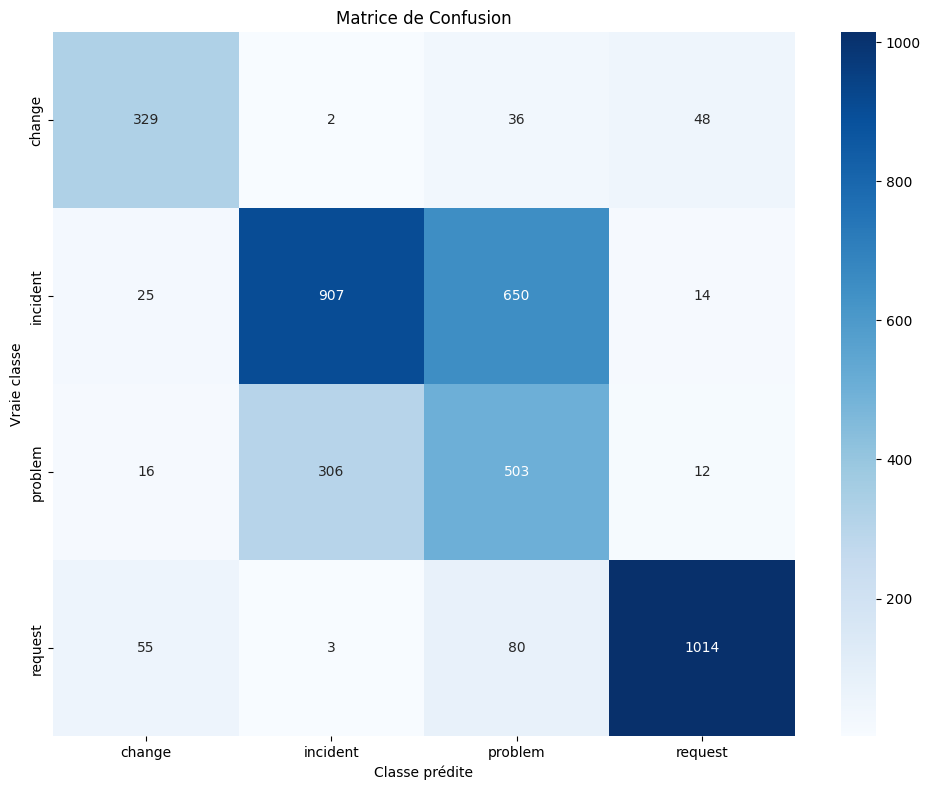

In [17]:
from sklearn.metrics import classification_report , accuracy_score , f1_score


# Métriques globales
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (macro): {f1_macro:.4f}")
print(f"F1-Score (weighted): {f1_weighted:.4f}")


print(classification_report(
    y_test, 
    y_pred, 
    target_names=le.classes_
))


# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.savefig('confusion_matrix.png')